# Predicting Stock Market data from Financial Modeling Prep and yfinance using Prophet

In [9]:
# import dependencies

import pandas as pd
import numpy as np
import yfinance as yf
import requests 
from prophet import Prophet 
from dotenv import load_dotenv 
import os

# Setting up secrets and API keys


In [15]:
# Loading the environment variables and setting the FMP_API_KEY

load_dotenv()
FMP_API_KEY = os.getenv("FMP_API_KEY")

In [16]:
# Function to fetch the data from the API
def fetch_data(url):
    response = requests.get(url).json()
    return response

In [27]:
# Select the stock and the date range to build URL for the Financial Modeling Prep API

symbol = input("Please select a Ticker like: AAPL, MSFT, TSLA, etc.")
from_date = input("Begining of the search date with the format 2022-01-01")
to_date = input("End of the search date with the format 2023-08-01")
url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?from={from_date}&to={to_date}&apikey={FMP_API_KEY}"



In [101]:
# Collect the data with the helper function 

data = fetch_data(url)

In [103]:
# Create helper funtion to preprocess the data for prophet model

def preprocess_data(data):
    df = pd.DataFrame(data["historical"])[["date", "adjClose"]]
    df.rename(columns={'date': 'ds', 'adjClose': 'y'}, inplace=True)
    return df

In [105]:
# Preprocess the data

data_df = preprocess_data(data)

data_df.head()

,ds,y
0,2023-12-29,192.28
1,2023-12-28,193.33
2,2023-12-27,192.90
3,2023-12-26,192.80
4,2023-12-22,193.35


# Training first model

In [126]:
# Helper function to train the prophet model with the data considering US holidays 
# and the seasonality of the data

def train_prophet_model(data):
    model = Prophet(
        seasonality_mode='multiplicative',
        changepoint_prior_scale=0.01,
        seasonality_prior_scale=10,
        holidays_prior_scale=15,
        weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=True
    )
    model.add_country_holidays(country_name='US')
    model.fit(data)
    return model

In [127]:
model = train_prophet_model(data_df)

04:05:34 - cmdstanpy - INFO - Chain [1] start processing
04:05:34 - cmdstanpy - INFO - Chain [1] done processing


# Forecasting

In [110]:
def generate_forecast(model, periods=365):
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast

def plot_forecast(model, forecast):
    model.plot(forecast)

/Users/albertoaigner/opt/anaconda3/envs/yelpReviews/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/albertoaigner/opt/anaconda3/envs/yelpReviews/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


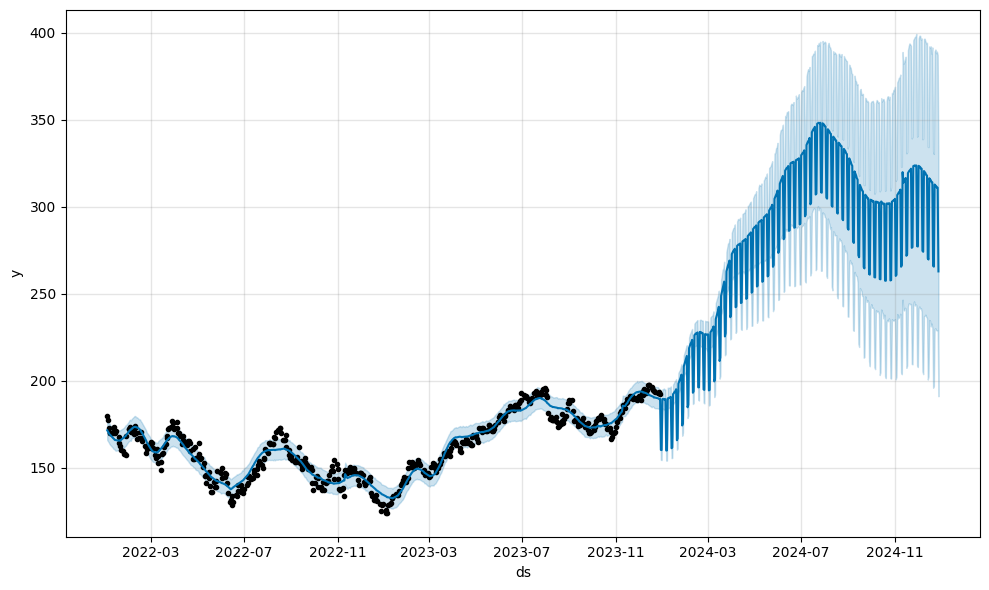

In [128]:
plot_forecast(model, generate_forecast(model))

# Using yfinance to get stock data

In [17]:
# Defining helper function to get ticker data from Yahoo Finance

def get_stock_data(symbol):
    stock_data = yf.Ticker(symbol)
    return stock_data

In [18]:
aapl = get_stock_data("AAPL")

In [68]:
apple_df = aapl.history(period="3y")

In [80]:
'2023-05-19 00:00:00-04:00' in apple_df.index

True

In [81]:
apple_df.loc['2023-05-19 00:00:00-04:00']

Open            1.756962e+02
High            1.756962e+02
Low             1.742519e+02
Close           1.744710e+02
Volume          5.577240e+07
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 2023-05-19 00:00:00-04:00, dtype: float64